In [1]:
import pandas as pd 
import numpy as np 
import networkx as nx 
import json 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime


import collections


In [ ]:
geotuscany 

In [2]:
G = nx.read_graphml('../data/clean/byuser.graphml',node_type=int)
print(len(G),len(G.edges))
for node in list(G.nodes)[:3]: print(G.nodes[node])
for node in list(G.edges)[:3]: print(G.edges[node])

9107 111741
{'province': 'PI', 'covidMeasure': 0, 'latitude': 43.85180773789867, 'longitude': 10.506207}
{'province': 'LU', 'covidMeasure': 0, 'latitude': 43.85135, 'longitude': 10.506207}
{'province': 'FI', 'covidMeasure': 0, 'latitude': 43.76973, 'longitude': 11.26562}
{'start': 414, 'end': 414, 'user': 'RobertaC2372', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'ClaudioC138', 'days': 0, 'geodistance': 0.0004577378986709846}
{'start': 414, 'end': 414, 'user': 'juan pablo A 116887066', 'days': 0, 'geodistance': 0.0004577378986709846}


In [3]:
df = pd.read_csv('../data/clean/covidars.csv',index_col='index')
df

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,PT-positivi,PT-deceduti,GR-positivi,GR-deceduti,MS-positivi,MS-deceduti,SI-positivi,SI-deceduti,LU-positivi,LU-deceduti
index,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,1,0.0,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,22920,626.0,8972,180.0,13289,523.0,13770,327.0,24567,662.0
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,22933,626.0,8988,180.0,13292,523.0,13784,327.0,24578,662.0
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,22938,626.0,9010,180.0,13296,523.0,13801,328.0,24591,662.0


In [4]:
477-432


45

In [5]:
84-45


39

In [6]:
provinceTags = ['PI','PO','LI','FI','AR','PT','GR','MS','SI','LU']
provinces = ['pisa','prato','livorno','florence','arezzo','pistoia','grosseto','massacarrara','siena','lucca']

In [7]:

for province in provinceTags:

    lagged = list(df[province+'-positivi'])
    lagged.insert(0,0)
    lagged.pop(-1)

    df[province+'-new_positivi'] = df[province+'-positivi'] - pd.Series(lagged,index=df.index) 
    df[province+'-new_positivi'].replace([i for i in df[province+'-'+'new_positivi'] if i<0],0,inplace=True)
    
        
df

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,1,0,1,0,0,0,0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,...,14,18,17,44,14,15,27,4,8,13
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,...,20,24,9,28,8,13,16,3,14,11
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,...,9,18,8,37,13,5,22,4,17,13


In [8]:
DF =df.copy()
df = df[0:432]


In [9]:
DF.to_csv('../data/covidarsNotCumulative.csv')

In [10]:
tickslocs = []
tickslabels = []
for i,e in enumerate(df.index):
    if i%48 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

['2020-02-14',
 '2020-04-02',
 '2020-05-20',
 '2020-07-07',
 '2020-08-24',
 '2020-10-11',
 '2020-11-28',
 '2021-01-15',
 '2021-03-04',
 '2021-04-20']

In [15]:
df.reset_index(inplace=True)
df

,index,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
0,2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,...,0,0,0,1,0,1,0,0,0,0
2,2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,...,0,0,0,0,0,1,0,0,0,0
4,2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2021-04-16,27396,648.0,20253,492.0,16411,391.0,61336,1938.0,20555,...,91,87,52,224,80,61,13,27,42,60
428,2021-04-17,27467,651.0,20330,498.0,16438,391.0,61463,1951.0,20596,...,71,77,27,127,41,74,17,31,31,26
429,2021-04-18,27535,652.0,20410,502.0,16480,392.0,61712,1955.0,20695,...,68,80,42,249,99,98,27,47,67,70
430,2021-04-19,27662,652.0,20519,505.0,16537,393.0,62004,1968.0,20808,...,127,109,57,292,113,124,40,36,68,86


In [11]:
colors = ['brown','red','orange','yellow','green','blue','']

In [33]:
tdf = pd.DataFrame(index = range(0,432), columns = provinceAb)
tdf.fillna(0,inplace=True)
tdf

,PI,PO,LI,FI,AR,PT,GR,MS,SI,LU
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
427,0,0,0,0,0,0,0,0,0,0
428,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,0,0,0,0,0,0
430,0,0,0,0,0,0,0,0,0,0


In [34]:
provinceAb = {'PI':416425,'PO':256047,'LI':329590,'FI':986001,'AR':336870,'PT':290819,'GR':218538,'MS':189841,'SI':263526,'LU':380676}

In [35]:
for e,edge in G.edges.items(): 
    u,v,_ = e 
    start = edge['start']
    end = edge['end']
    startProvince = G.nodes[u]['province']
    endProvince = G.nodes[v]['province']

    tdf.loc[end,endProvince] += df.loc[start,startProvince+'-new_positivi'] / (provinceAb[province] * (end - start +1))

In [36]:
tdf

,PI,PO,LI,FI,AR,PT,GR,MS,SI,LU
0,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
1,0.000011,5.253812e-06,0.000008,0.000496,0.0,0.000003,0.000000e+00,0.000000e+00,0.000000,2.626906e-06
2,0.000000,2.626906e-06,0.000000,0.000366,0.0,0.000013,0.000000e+00,0.000000e+00,0.000001,2.626906e-06
3,0.000000,2.626906e-06,0.000000,0.000014,0.0,0.000016,0.000000e+00,8.756353e-07,0.000000,2.626906e-06
4,0.000047,0.000000e+00,0.000032,0.001897,0.0,0.000016,0.000000e+00,0.000000e+00,0.000047,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
427,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,2.162307e-07
428,0.000000,7.296961e-08,0.000000,0.000000,0.0,0.000000,0.000000e+00,1.235356e-06,0.000000,0.000000e+00
429,0.000000,5.479603e-05,0.000000,0.000000,0.0,0.000000,1.631619e-08,2.411586e-06,0.000000,0.000000e+00
430,0.000000,1.706132e-07,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00


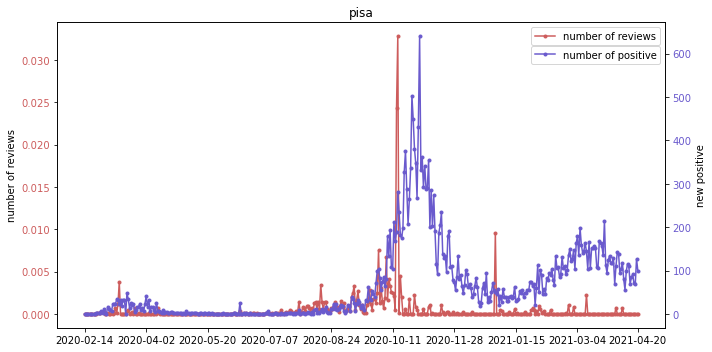

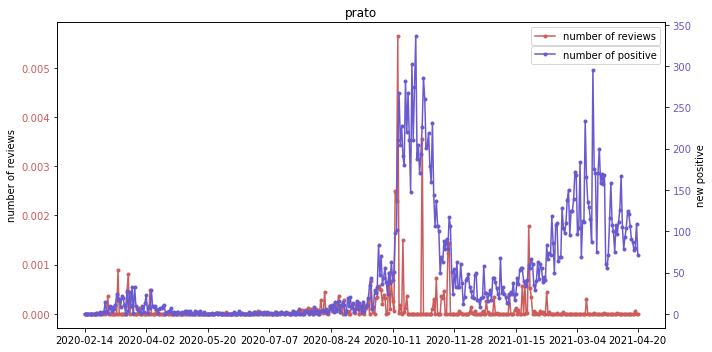

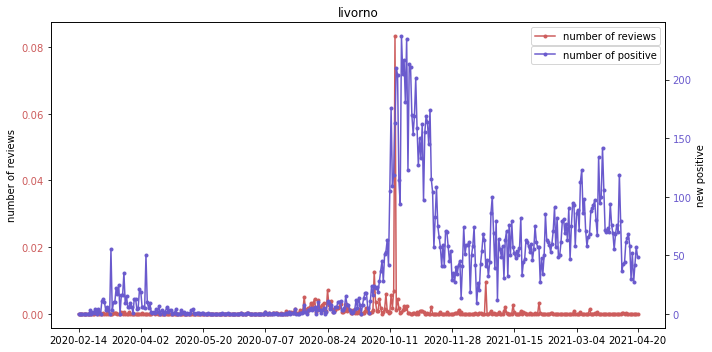

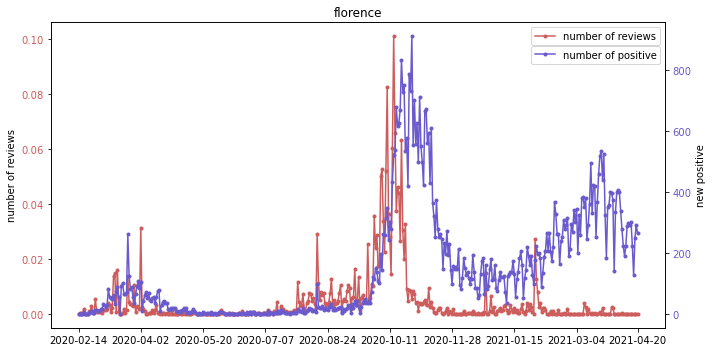

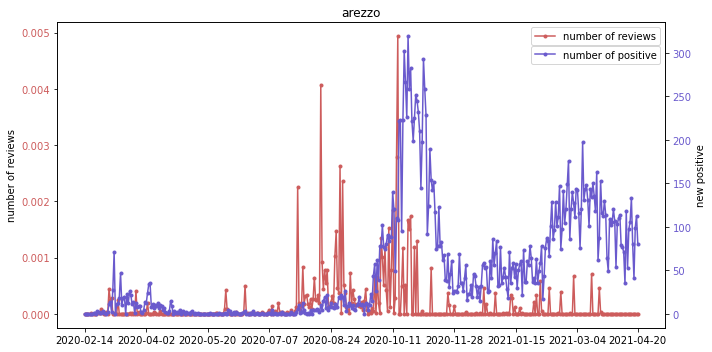

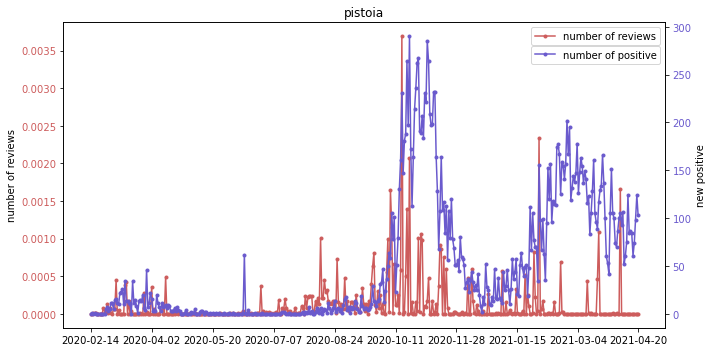

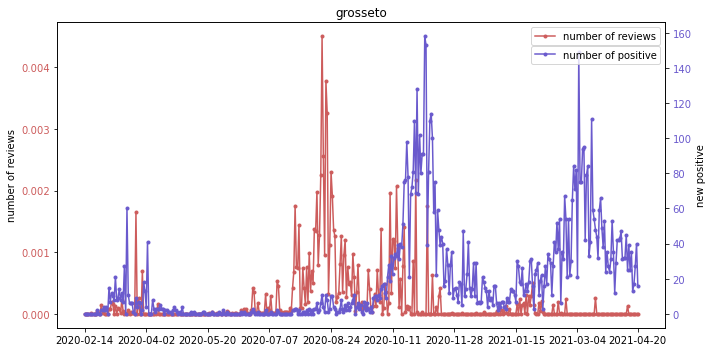

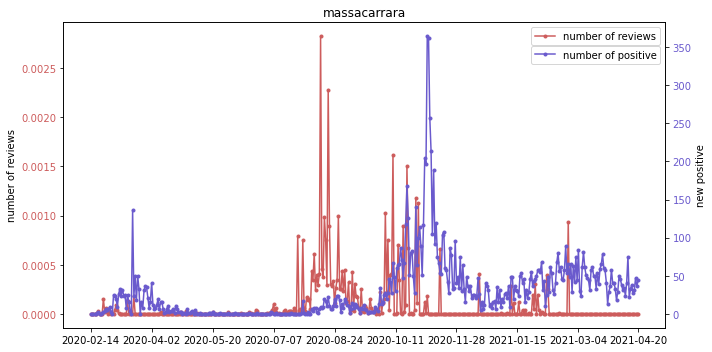

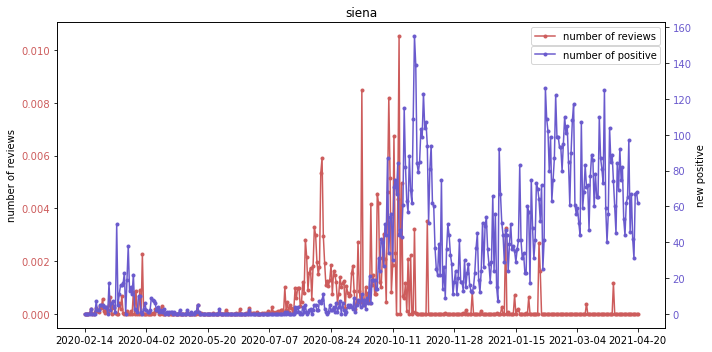

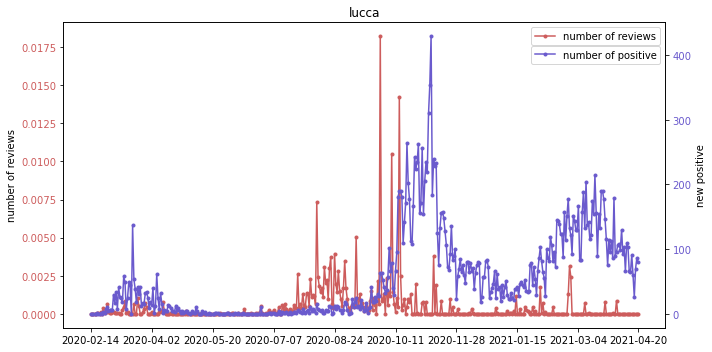

In [37]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    
    
    
    c1 = 'indianred'
    c2= 'slateblue'
    ax1.plot(tdf[province],  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
        
    ax2.plot(df[province+'-'+'new_positivi'],c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

#### ROLLING

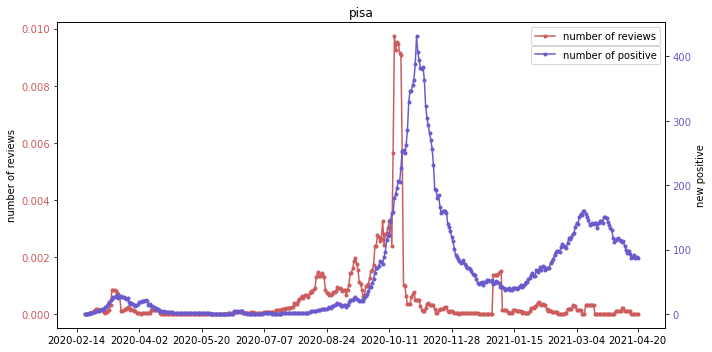

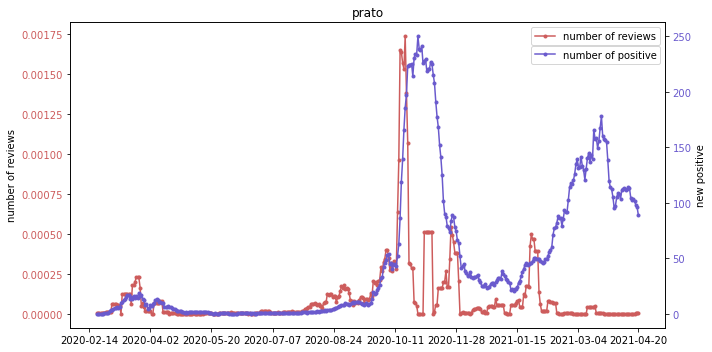

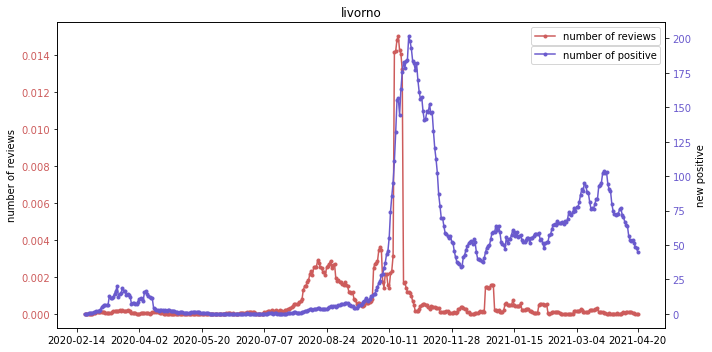

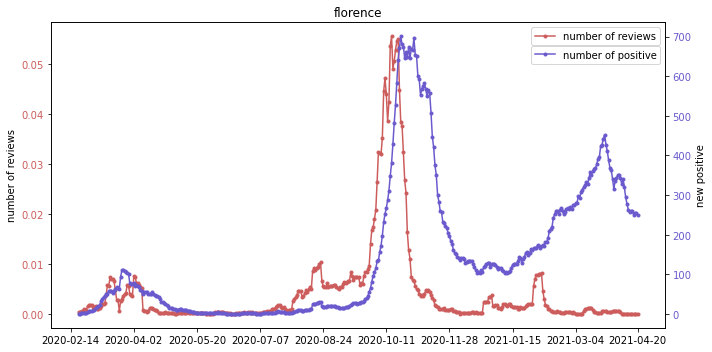

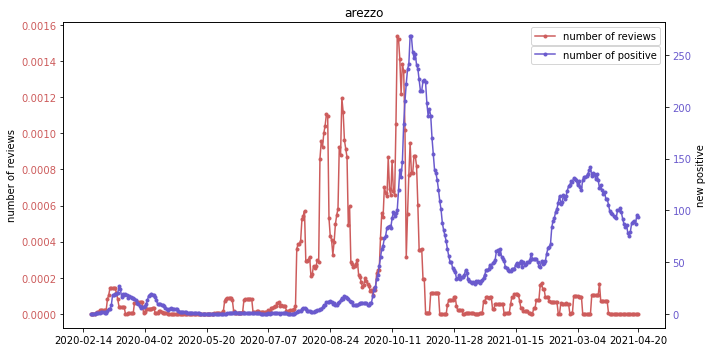

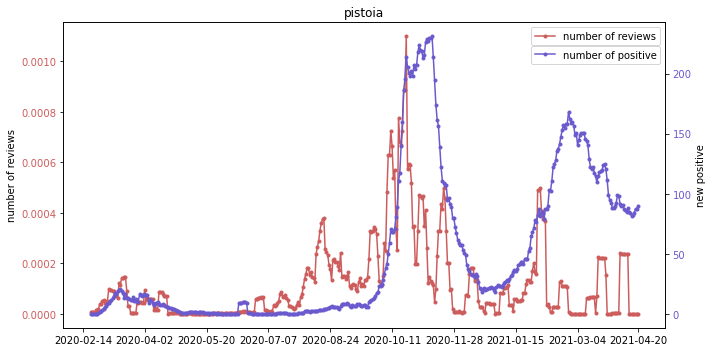

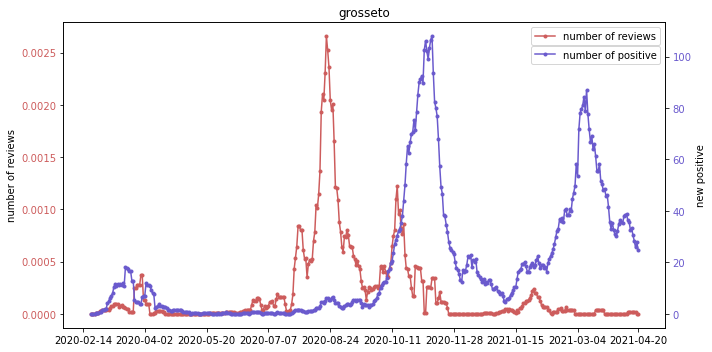

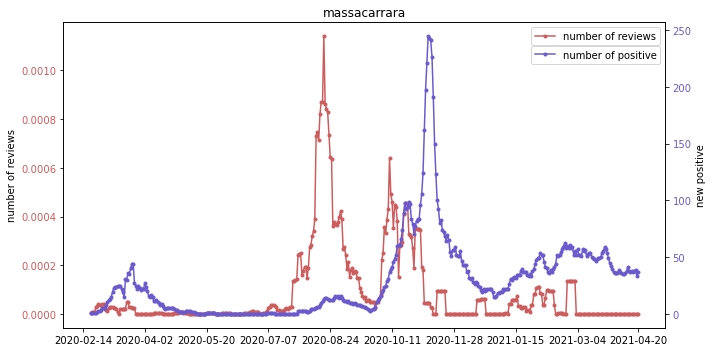

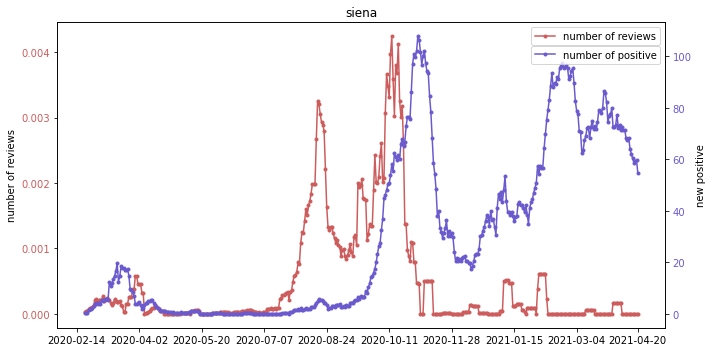

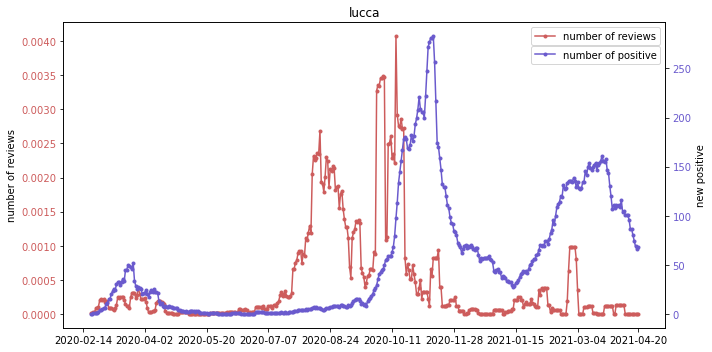

In [38]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
    
    
    
    c1 = 'indianred'
    c2= 'slateblue'
    ts1 = pd.Series(tdf[province])
    #(ts1 - ts1.mean())/ts1.std()
    counter = (ts1).rolling(window=7).mean()
    ax1.plot(counter,  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
      
    ts2 = df[province+'-'+'new_positivi']
    #(ts2 - ts2.mean())/ts2.std()
    ax2.plot((ts2).rolling(window=7).mean(),c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

#### MOVING AVERAGE

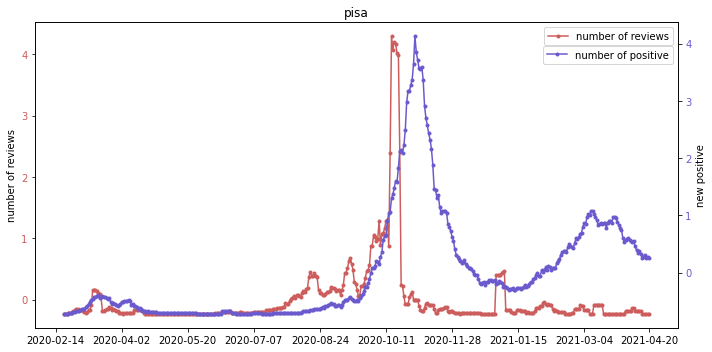

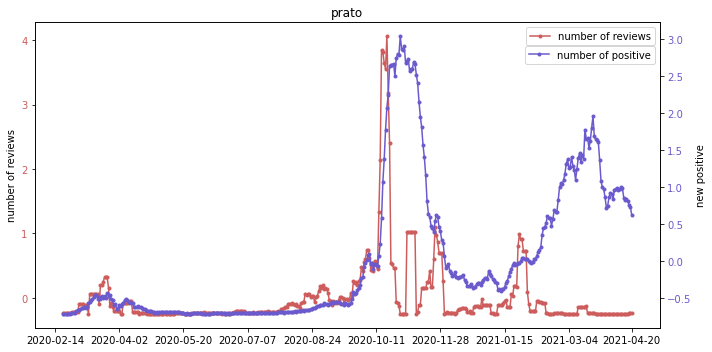

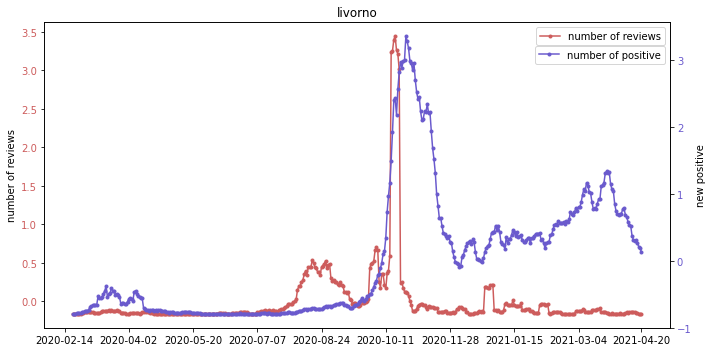

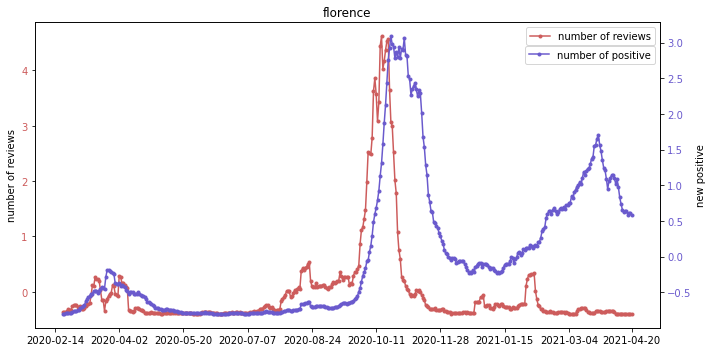

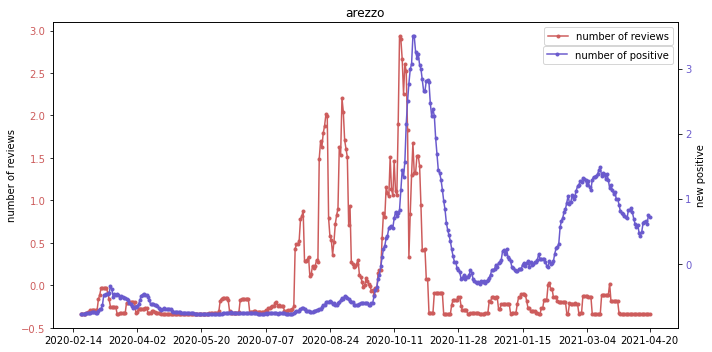

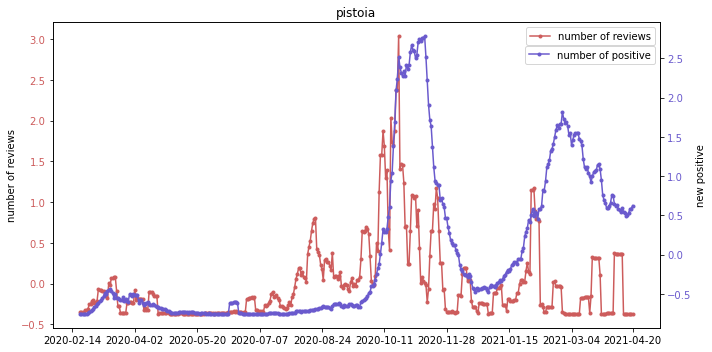

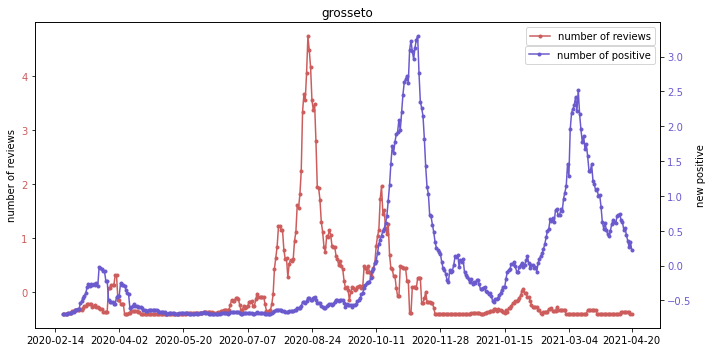

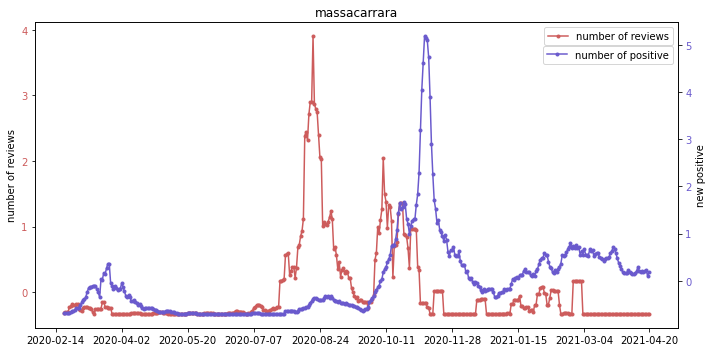

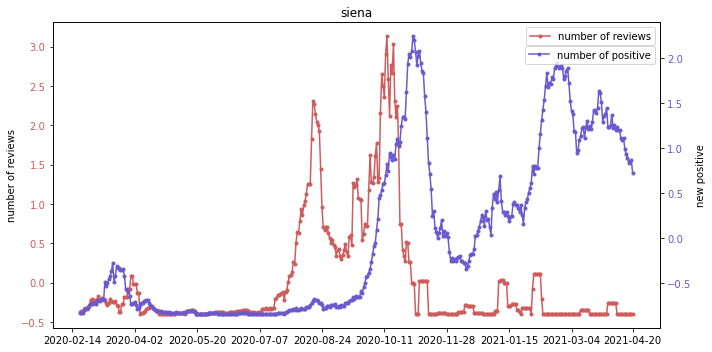

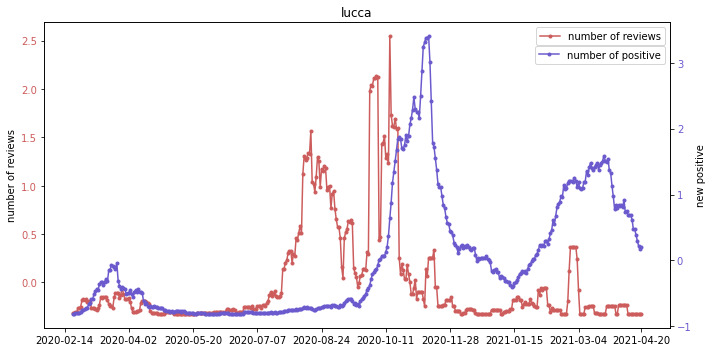

In [39]:

for i, province in enumerate(provinceTags):
    fig, ax1 = plt.subplots(figsize=(10,5))
    
  
    
    c1 = 'indianred'
    c2= 'slateblue'
    ts1 = pd.Series(tdf[province])
    
    counter = ((ts1 - ts1.mean())/ts1.std()).rolling(window=7).mean()
    ax1.plot(counter,  marker='.',  c=c1, label='number of reviews')
    ax1.set_ylabel('number of reviews')
    ax1.tick_params(axis='y', labelcolor=c1)
    plt.legend()
    
    ax2 = ax1.twinx()
      
    ts2 = df[province+'-'+'new_positivi']
    #
    ax2.plot(((ts2 - ts2.mean())/ts2.std()).rolling(window=7).mean(),c=c2,  marker='.' ,label='number of positive')
    ax2.set_ylabel('new positive')
    ax2.tick_params(axis='y', labelcolor=c2)
    
    plt.xticks(tickslocs, tickslabels)
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
    plt.title(provinces[i])
    fig.tight_layout()
    plt.show()

#### find best lag

In [40]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix
from scipy.spatial.distance import cdist, euclidean

In [15]:
ts2 = sum([df[province+'-'+'new_positivi'] for province in provinceTags])

In [16]:
dtw(ts1[6:], ts2[6:])

15698.783774547632

In [17]:
euclidean(ts1[6:], ts2[6:])

17164.80203789138

In [44]:
from scipy.spatial.distance import euclidean, cityblock

distances = []
lags = []

for i, province in enumerate(provinceTags):
    
    
   
    ts1 =tdf[province]
    ts1 = ((ts1 - ts1.mean())/ts1.std()).rolling(window=7).mean()
    ts1 = ts1[6:]
    
    ts2 = df[province+'-'+'new_positivi']
    ts2 = ((ts2 - ts2.mean())/ts2.std()).rolling(window=7).mean()
    ts2 = ts2[6:]
    
    distances.append( cityblock(ts1, ts2)/ len(ts1))
    lags.append(0)
    
    for lag in range(100):
        
        ts1 = ts1[:-1]
        ts2 = ts2[1:]
        
        dist = euclidean(ts1, ts2) / len(ts1)
        if dist  < distances[i]:
            distances[i] = dist
            lags[i] = lag
        
        

In [45]:
print(distances)
print(lags, np.mean(lags))

[0.0354656740371571, 0.04115207810650641, 0.04176299481641914, 0.03623955493538786, 0.04260004049353464, 0.03780630163291795, 0.04390145255025182, 0.034783954302134344, 0.05011877238103099, 0.04378884118002295]
[16, 18, 10, 14, 10, 14, 75, 81, 20, 26] 28.4


In [43]:
print(distances)
print(lags, np.mean(lags))

[0.5864500823308217, 0.6448890747141912, 0.7070473140052963, 0.5943266851066328, 0.6747026370300475, 0.6173316478447908, 0.600605264282797, 0.5105190916258076, 0.79592882699958, 0.7012024218096817]
[16, 19, 10, 13, 12, 10, 76, 81, 20, 29] 28.6


In [46]:
bestlag = 28

## Comparation

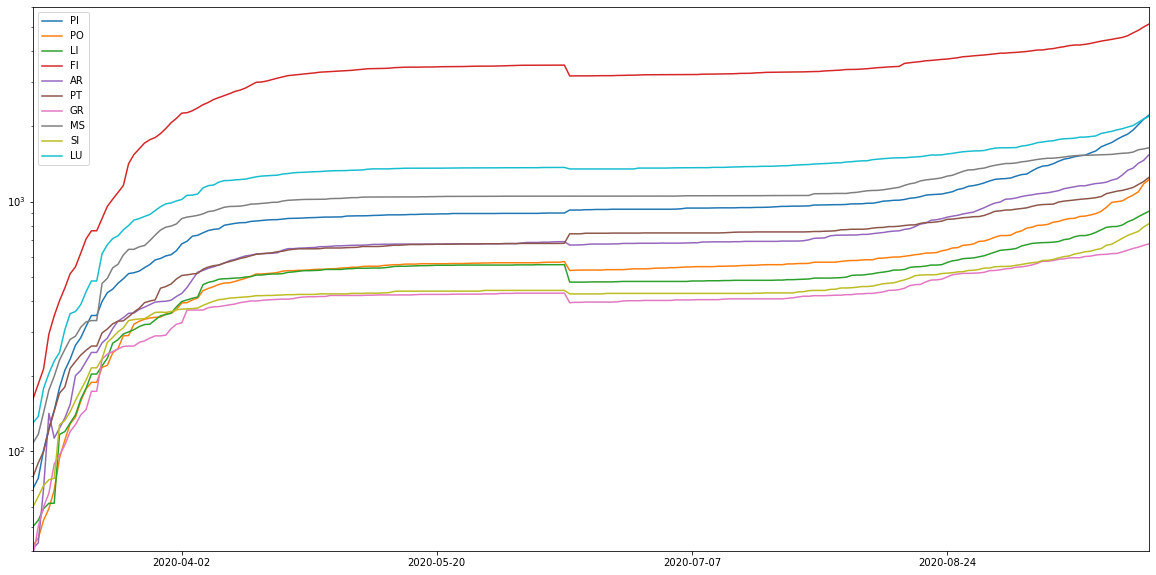

In [47]:
plt.figure(figsize=(20,10))
for p in provinceTags:
    plt.plot(df[p+'-'+'positivi'],label=p)
    
    plt.yscale('log')
    plt.xticks(tickslocs, tickslabels)
    plt.xlim(20,230)
    plt.ylim(40,6000)
plt.legend()

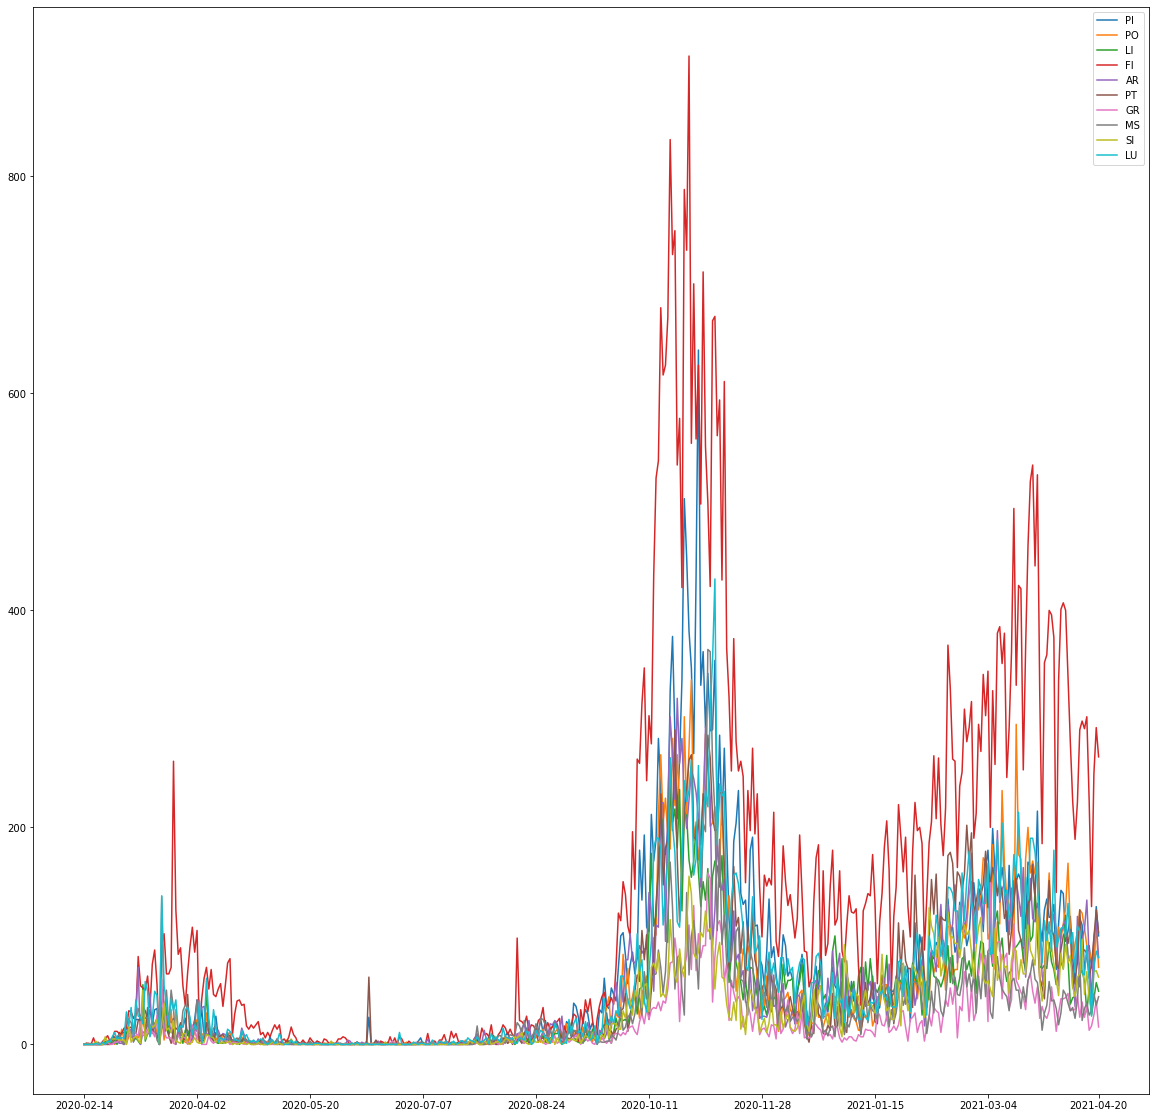

In [48]:
plt.figure(figsize=(20,20))
for p in provinceTags:
    plt.plot(df[p+'-'+'new_positivi'],label=p)
    plt.xticks(tickslocs, tickslabels)
    
plt.legend()

### Random Forest Regression 
Wetry to use reviews to rpedict positives 

In [49]:
bestlag = 28

In [50]:
provinceTags

['PI', 'PO', 'LI', 'FI', 'AR', 'PT', 'GR', 'MS', 'SI', 'LU']

In [51]:
DF

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2020-02-14,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2020-02-15,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,1,0,1,0,0,0,0
2020-02-16,0,0.0,0,0.0,0,0.0,2,0.0,0,0.0,...,0,0,0,1,0,0,0,0,0,0
2020-02-17,0,0.0,0,0.0,0,0.0,1,0.0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
2020-02-18,0,0.0,0,0.0,0,0.0,7,0.0,0,0.0,...,0,0,0,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,29133,697.0,22468,592.0,17432,416.0,67071,2190.0,22783,492.0,...,14,18,17,44,14,15,27,4,8,13
2021-06-01,29153,699.0,22492,593.0,17441,416.0,67099,2193.0,22791,495.0,...,20,24,9,28,8,13,16,3,14,11
2021-06-02,29162,700.0,22510,593.0,17449,416.0,67136,2194.0,22804,497.0,...,9,18,8,37,13,5,22,4,17,13


In [52]:
dftest = DF[432-6:432+bestlag ]
dftest

,PI-positivi,PI-deceduti,PO-positivi,PO-deceduti,LI-positivi,LI-deceduti,FI-positivi,FI-deceduti,AR-positivi,AR-deceduti,...,PI-new_positivi,PO-new_positivi,LI-new_positivi,FI-new_positivi,AR-new_positivi,PT-new_positivi,GR-new_positivi,MS-new_positivi,SI-new_positivi,LU-new_positivi
index,,,,,,,,,,,,,,,,,,,,,
2021-04-15,27305,644.0,20166,491.0,16359,391.0,61112,1932.0,20475,406.0,...,84,91,30,302,133,84,35,38,67,91
2021-04-16,27396,648.0,20253,492.0,16411,391.0,61336,1938.0,20555,406.0,...,91,87,52,224,80,61,13,27,42,60
2021-04-17,27467,651.0,20330,498.0,16438,391.0,61463,1951.0,20596,407.0,...,71,77,27,127,41,74,17,31,31,26
2021-04-18,27535,652.0,20410,502.0,16480,392.0,61712,1955.0,20695,408.0,...,68,80,42,249,99,98,27,47,67,70
2021-04-19,27662,652.0,20519,505.0,16537,393.0,62004,1968.0,20808,409.0,...,127,109,57,292,113,124,40,36,68,86
2021-04-20,27762,653.0,20590,508.0,16586,393.0,62269,1984.0,20888,410.0,...,100,71,49,265,80,103,16,44,62,80
2021-04-21,27887,656.0,20702,510.0,16645,394.0,62515,1991.0,20951,410.0,...,125,112,59,246,63,80,14,35,81,80
2021-04-22,27972,657.0,20782,512.0,16690,394.0,62695,2003.0,21075,410.0,...,85,80,45,180,124,56,34,21,42,63
2021-04-23,28026,659.0,20815,515.0,16722,396.0,62878,2012.0,21140,410.0,...,54,33,32,183,65,70,9,28,53,43


data preparation

In [53]:
X_trains = []
y_trains = []
X_tests = []
y_tests = []

for province in provinceTags:
    
   
            
        ts1 = pd.Series(tdf[province])
        #(ts1 - ts1.mean())/ts1.std()
        ts1 = (ts1).rolling(window=7).mean()
        ts1 = ts1[6:]
        
        ts2 = df[province+'-'+'new_positivi']
        #(ts2 - ts2.mean())/ts2.std()
        ts2 = (ts2).rolling(window=7).mean()
        ts2 = ts2[6:]
        
      
        
        X_trains.append(ts1[:-bestlag])
        y_trains.append(ts2[bestlag:])
        
        
        ts2 = dftest[province+'-'+'new_positivi']
        #(ts2 - ts2.mean())/ts2.std()
        ts2 = (ts2).rolling(window=7).mean()
        ts2 = ts2[6:]
        
        X_tests.append(ts1[-bestlag:])
        y_tests.append(ts2)
        
        
            

In [54]:
y_tests

[index
 2021-04-21    95.142857
 2021-04-22    95.285714
 2021-04-23    90.000000
 2021-04-24    89.142857
 2021-04-25    89.571429
 2021-04-26    85.142857
 2021-04-27    78.000000
 2021-04-28    70.857143
 2021-04-29    66.857143
 2021-04-30    66.000000
 2021-05-01    61.857143
 2021-05-02    57.714286
 2021-05-03    52.142857
 2021-05-04    48.428571
 2021-05-05    42.714286
 2021-05-06    39.142857
 2021-05-07    34.714286
 2021-05-08    33.285714
 2021-05-09    30.285714
 2021-05-10    26.714286
 2021-05-11    26.428571
 2021-05-12    25.571429
 2021-05-13    24.428571
 2021-05-14    24.285714
 2021-05-15    22.142857
 2021-05-16    21.285714
 2021-05-17    18.142857
 2021-05-18    17.571429
 Name: PI-new_positivi, dtype: float64,
 index
 2021-04-21    89.571429
 2021-04-22    88.000000
 2021-04-23    80.285714
 2021-04-24    75.142857
 2021-04-25    80.142857
 2021-04-26    75.571429
 2021-04-27    79.000000
 2021-04-28    76.571429
 2021-04-29    75.142857
 2021-04-30    80.000

In [55]:
for y in y_trains: print(np.shape(y))

(398,)
(398,)
(398,)
(398,)
(398,)
(398,)
(398,)
(398,)
(398,)
(398,)


In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression


    


regr = RandomForestRegressor(max_depth=34, warm_start=True, random_state=0)

for t in range(100):
    for X,y in zip(X_trains,y_trains):
    
        X = np.array(X).reshape(-1,1)
        y = np.array(y).reshape(-1,1)
        
        regr.fit(X, y)

    


    
    







<ipython-input-56-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
<ipython-input-56-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-56-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators do

C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-56-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "
<ipython-input-56-3801f7f2d191>:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regr.fit(X, y)
C:\Users\carlo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:369: UserWarning: Warm-start fitting without 

In [57]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score




def absolute_percentage_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_pred)


def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(absolute_percentage_error(y_true, y_pred))


def max_absolute_percentage_error(y_true, y_pred):
    return np.max(absolute_percentage_error(y_true, y_pred))


def total_absolute_percentage_error(y_true, y_pred):
    return np.sum(absolute_percentage_error(y_true, y_pred))


def evaluate(y_true, y_pred, ts):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'MAD': median_absolute_error(y_true, y_pred),
        'R2': r2_score(y_true, y_pred),
        'MAPE': mean_absolute_percentage_error(y_true, y_pred),
        'MAXAPE': max_absolute_percentage_error(y_true, y_pred),
        'TAPE': total_absolute_percentage_error(y_true, y_pred)
    }

In [58]:

tickslocs = []
tickslabels = []
for i,e in enumerate(list(y_trains[0].index)):
    if i%48 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

[34, 82, 130, 178, 226, 274, 322, 370, 418, 431]

In [59]:
len(y_trains)

10

MAE 66.341
RMSE 93.301
MAD 39.635
R2 -1.116
MAPE 2.926
MAXAPE 126.041
TAPE 1164.601


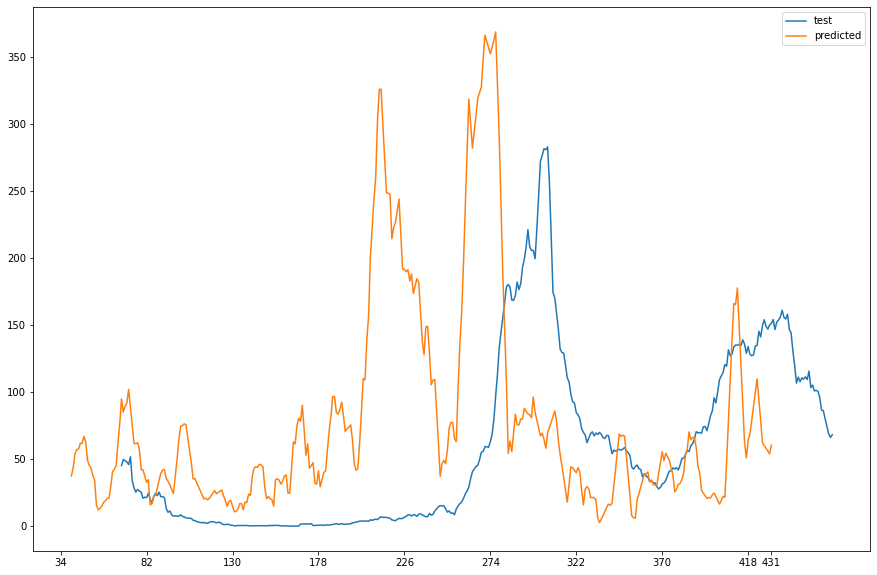

MAE 59.622
RMSE 82.606
MAD 38.835
R2 -0.634
MAPE 1.245
MAXAPE 25.482
TAPE 445.698


In [60]:
X_test = np.array(X_trains[-1]).reshape(-1,1)
y_test =  y_trains[-1]

y_pred = regr.predict(X_test)
for k, v in evaluate(y_test, y_pred, X_test).items():
    print('%s %.3f' % (k, v))

y_pred = pd.Series(y_pred).rolling(window=7).mean()

plt.figure(figsize=(15,10))
plt.plot(y_test,label = 'test')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.xticks(tickslocs, tickslabels)
plt.show()


for k, v in evaluate(y_test[6:], y_pred[6:], X_test[6:]).items():
    print('%s %.3f' % (k, v))



MAE 69.438
RMSE 104.221
MAD 41.342
R2 -9.043
MAPE 4.177
MAXAPE 99.654
TAPE 1662.249


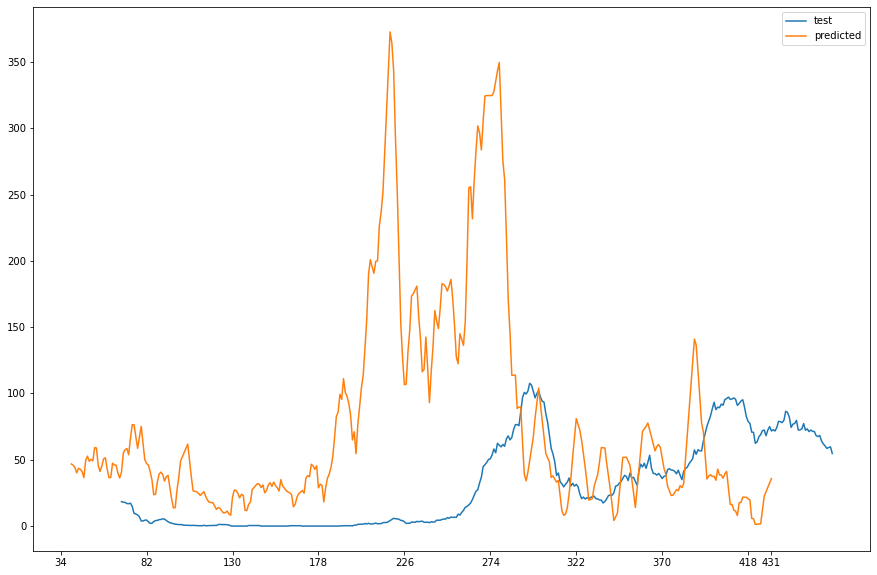

MAE 64.693
RMSE 94.149
MAD 39.700
R2 -7.093
MAPE 1.539
MAXAPE 47.646
TAPE 550.807


In [61]:
X_test = np.array(X_trains[-2]).reshape(-1, 1) 


y_test =  y_trains[-2]

y_pred = regr.predict(X_test)

for k, v in evaluate(y_test, y_pred, X_test).items():
    print('%s %.3f' % (k, v))
y_pred = pd.Series(y_pred).rolling(window=7).mean()

plt.figure(figsize=(15,10))
plt.plot(y_test,label = 'test')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.xticks(tickslocs, tickslabels)
plt.show()


for k, v in evaluate(y_test[6:], y_pred[6:], X_test[6:]).items():
    print('%s %.3f' % (k, v))

### Forecasting

In [62]:
len(y_tests[0])

28

In [63]:

tickslocs = []
tickslabels = []
for i,e in enumerate(list(y_tests[0].index)):
    if i%9 == 0: 
        tickslocs.append(i)
        tickslabels.append(e)

tickslocs.append(i)
tickslabels.append(e)
tickslabels

['2021-04-21', '2021-04-30', '2021-05-09', '2021-05-18', '2021-05-18']

MAE 46.333
RMSE 55.069
MAD 46.840
R2 -3.311
MAPE 1.107
MAXAPE 2.858
TAPE 31.009


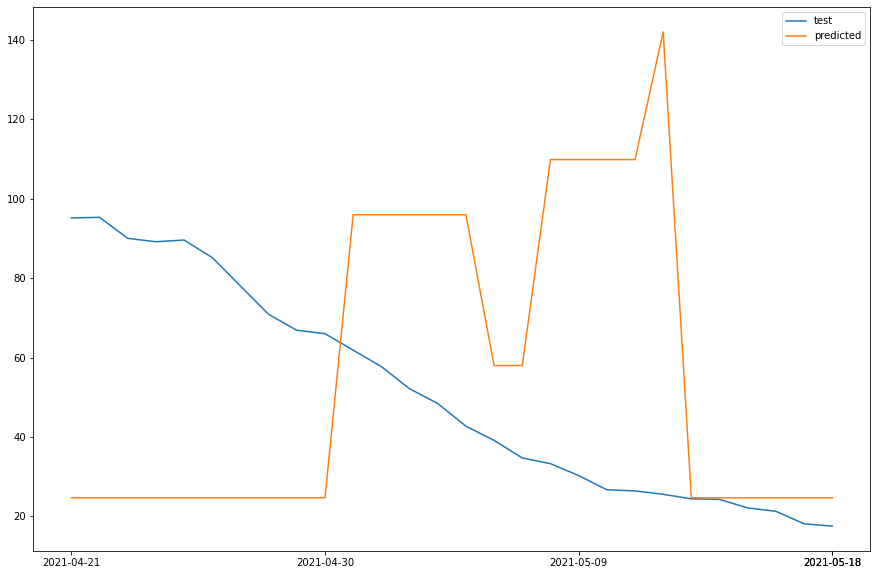

MAE 40.965

RMSE 51.650

MAD 41.729

R2 -6.638

MAPE 0.681

MAXAPE 2.158

TAPE 14.973

MAE 44.251
RMSE 47.844
MAD 45.620
R2 -6.619
MAPE 14.171
MAXAPE 111.528
TAPE 396.791


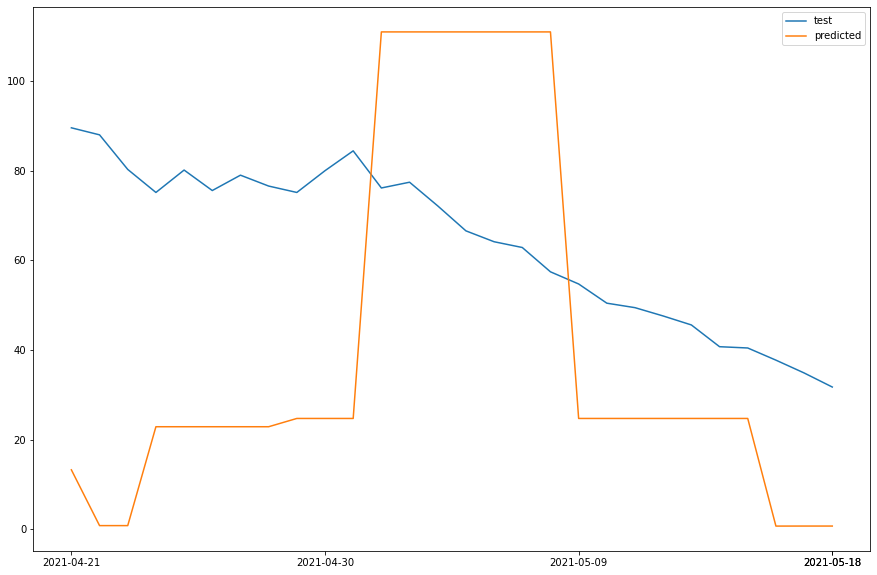

MAE 37.894

RMSE 40.195

MAD 35.937

R2 -5.008

MAPE 7.761

MAXAPE 54.869

TAPE 170.732

MAE 28.064
RMSE 37.341
MAD 25.065
R2 -7.497
MAPE 5.956
MAXAPE 32.166
TAPE 166.771


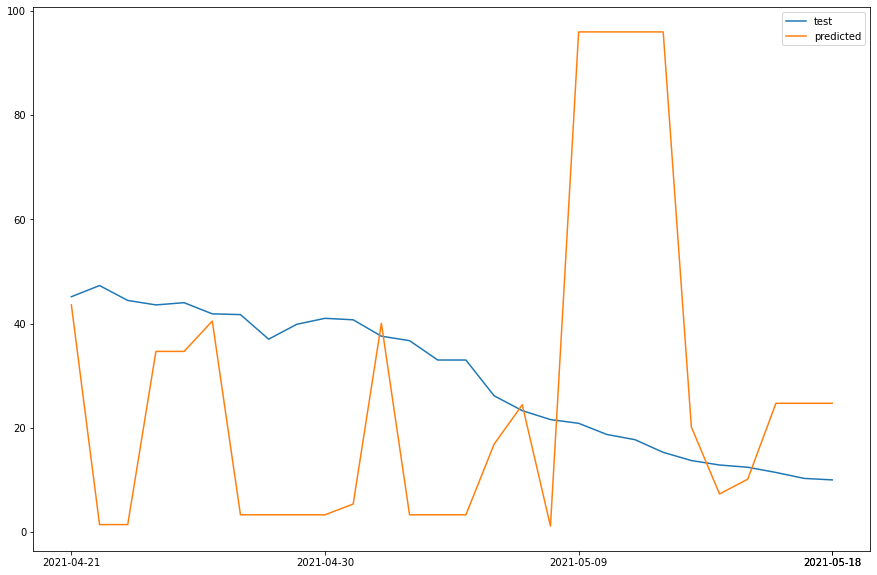

MAE 30.714

RMSE 39.839

MAD 29.695

R2 -11.261

MAPE 4.720

MAXAPE 17.970

TAPE 103.845

MAE 125.307
RMSE 132.140
MAD 120.253
R2 -9.345
MAPE 18.130
MAXAPE 136.097
TAPE 507.642


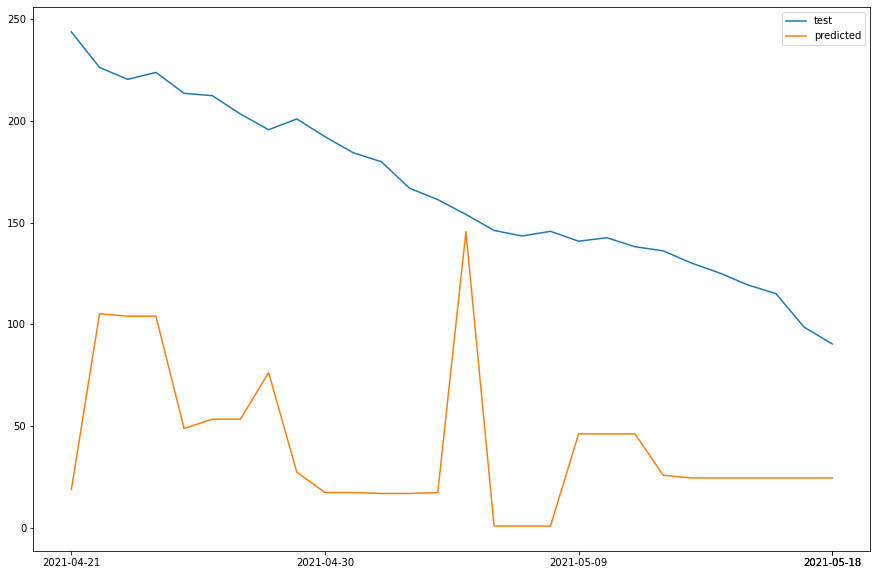

MAE 118.369

RMSE 125.011

MAD 114.666

R2 -14.880

MAPE 22.095

MAXAPE 136.097

TAPE 486.091

MAE 42.285
RMSE 45.546
MAD 46.372
R2 -7.829
MAPE 2.000
MAXAPE 9.069
TAPE 56.011


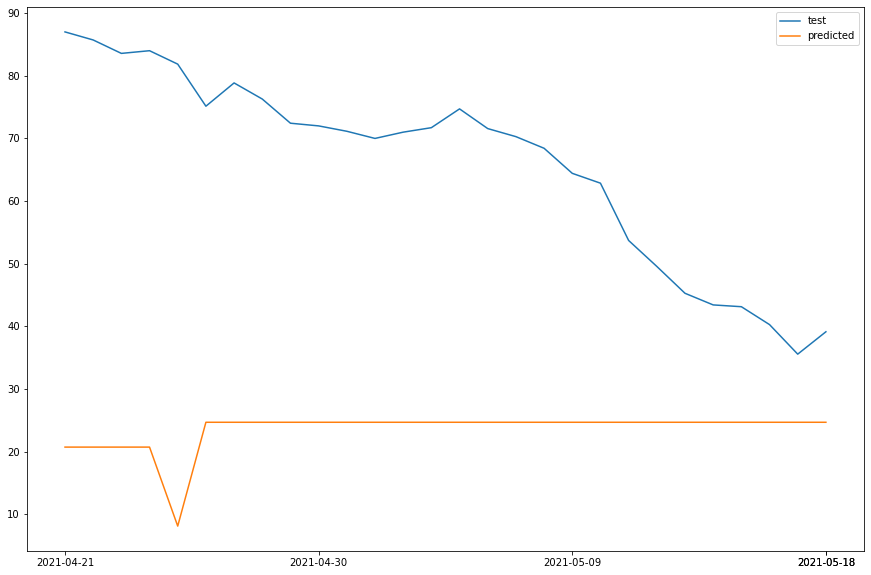

MAE 36.476

RMSE 39.046

MAD 44.515

R2 -6.854

MAPE 1.477

MAXAPE 2.193

TAPE 32.489

MAE 26.734
RMSE 31.828
MAD 28.966
R2 -2.167
MAPE 1.327
MAXAPE 6.767
TAPE 37.162


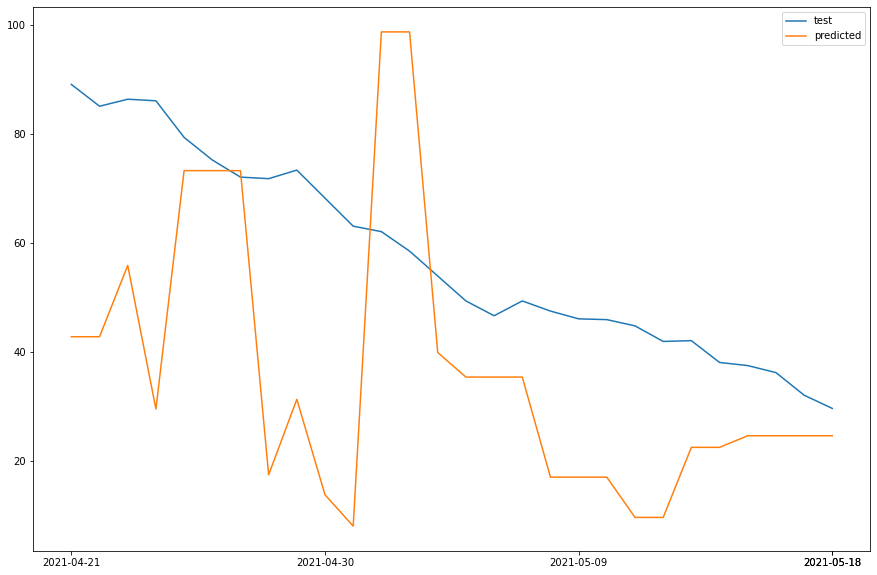

MAE 25.677

RMSE 30.352

MAD 24.232

R2 -4.525

MAPE 1.479

MAXAPE 6.767

TAPE 32.531

MAE 6.727
RMSE 10.068
MAD 2.929
R2 -17.923
MAPE 0.985
MAXAPE 3.870
TAPE 27.582


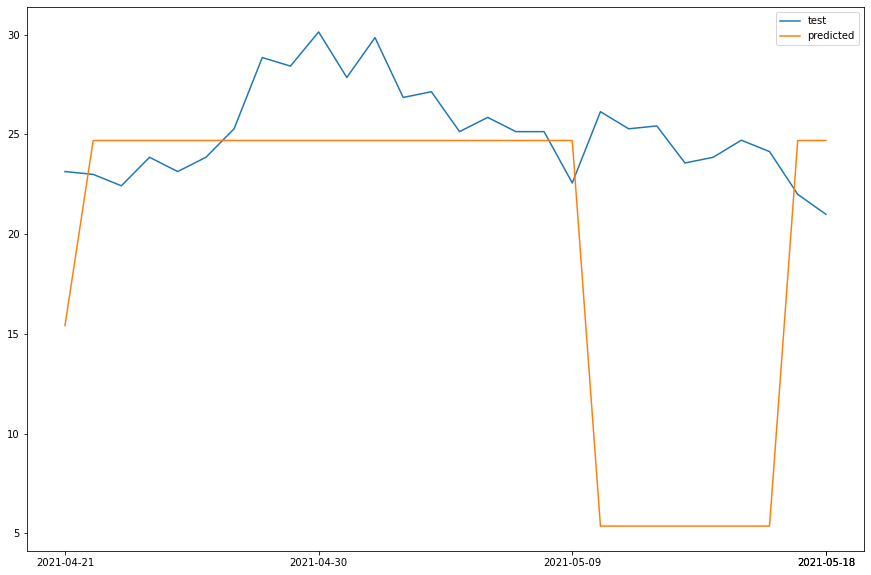

MAE 7.883

RMSE 11.214

MAD 3.714

R2 -21.879

MAPE 1.218

MAXAPE 3.870

TAPE 26.789

MAE 18.327
RMSE 27.688
MAD 8.500
R2 -8.436
MAPE 0.382
MAXAPE 0.857
TAPE 10.709


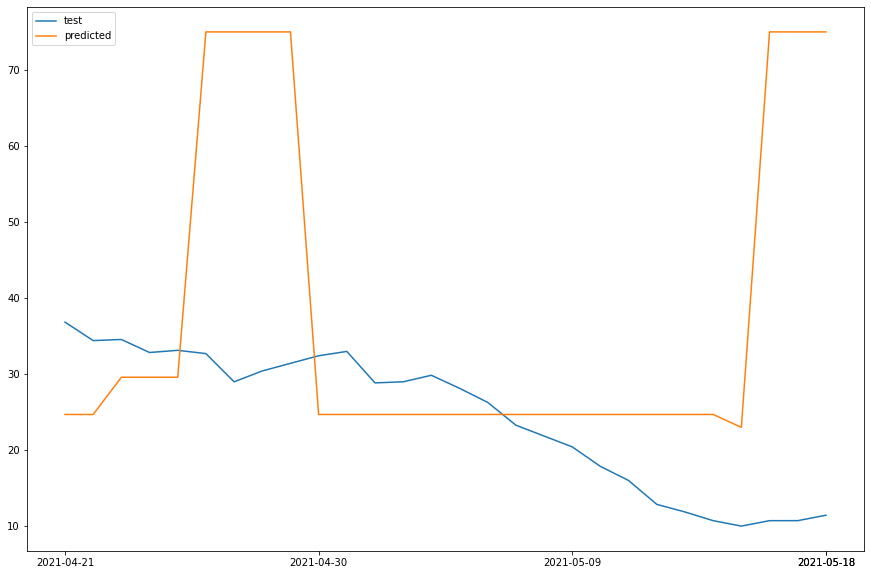

MAE 19.869

RMSE 29.680

MAD 8.500

R2 -11.655

MAPE 0.403

MAXAPE 0.857

TAPE 8.861

MAE 13.741
RMSE 18.834
MAD 10.197
R2 -1.027
MAPE 0.593
MAXAPE 1.418
TAPE 16.599


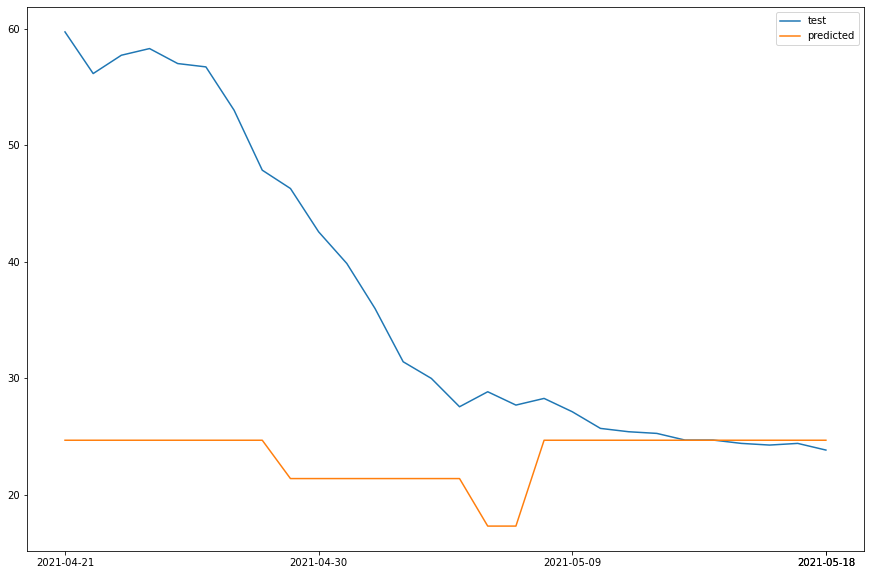

MAE 8.517

RMSE 12.488

MAD 4.873

R2 -1.092

MAPE 0.391

MAXAPE 1.162

TAPE 8.608

MAE 27.843
RMSE 33.752
MAD 30.892
R2 -3.297
MAPE 2.090
MAXAPE 16.420
TAPE 58.527


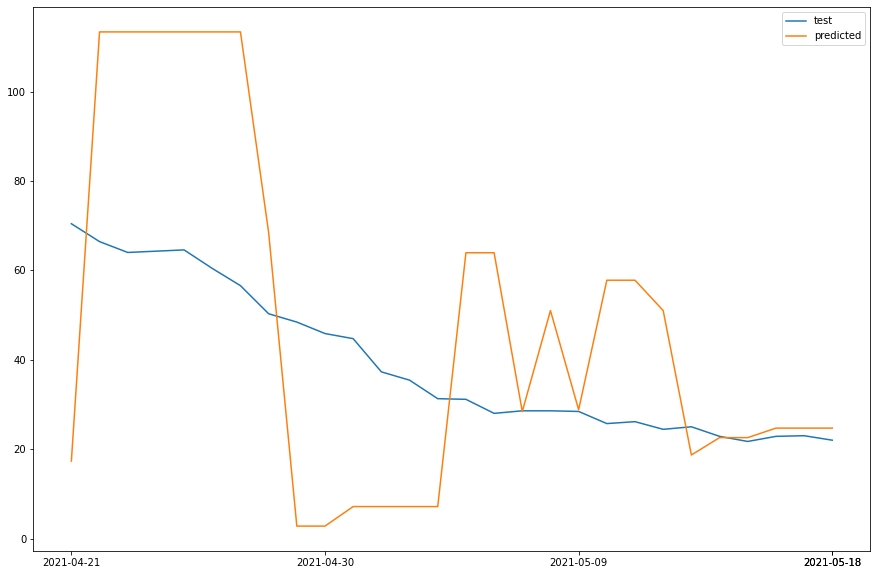

MAE 21.796

RMSE 27.680

MAD 25.357

R2 -6.367

MAPE 2.422

MAXAPE 16.420

TAPE 53.285



In [65]:
for X,y in zip(X_tests,y_tests):
    X_test = np.array(X[:len(y)]).reshape(-1, 1) 
    y_test = y
    y_pred = regr.predict(X_test)
    
    for k, v in evaluate(y_test, y_pred, X_test).items():
        print('%s %.3f' % (k, v))

    

    plt.figure(figsize=(15,10))
    plt.plot(y_test,label = 'test')
    plt.plot(y_pred, label='predicted')
    plt.legend()
    plt.xticks(tickslocs, tickslabels)
    plt.show()


    for k, v in evaluate(y_test[6:], y_pred[6:], X_test[6:]).items():
        print('%s %.3f' % (k, v))
        print()

In [66]:
len(y) 

28